# Dataset exploration

In [16]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [17]:
# Load train and val datasets
train_data = pd.read_csv("__data/train.tsv", delimiter="\t")
val_data = pd.read_csv("__data/val.tsv", delimiter="\t")

# Display the first few rows of each dataset
print("Train Dataset:")
print(train_data.head())

print("\nValidation Dataset:")
print(val_data.head())


Train Dataset:
   25244316  \
0  46931111   
1       743   
2   6151363   
3      7344   
4    170780   

  UDP-alpha-D-galactofuranose(2-) is a UDP-D-galactofuranose(2-) in which the anomeric centre of the galactofuranose moiety has alpha-configuration. It is a conjugate base of an UDP-alpha-D-galactofuranose.  
0  2-acetamido-2-deoxy-3-O-(4-deoxy-alpha-L-threo...                                                                                                                                                            
1  Glutaric acid is an alpha,omega-dicarboxylic a...                                                                                                                                                            
2  All-trans-4-oxoretinal is a retinoid that is a...                                                                                                                                                            
3  Ethyl 2-hydroxypropanoate is the ethyl ester o...      

## Graph dataset statistics

In [18]:
# Load the token embedding dictionary
token_embedding_dict = np.load("__data/token_embedding_dict.npy", allow_pickle=True)[()]

print('Length of the token embedding dict',len(token_embedding_dict))

# Display a few entries from the dictionary
for idx, (token, embedding) in enumerate(token_embedding_dict.items()):
    if idx < 20:  # Display only the first 5 entries for brevity
        print(f"Token: {token}, Embedding shape: {embedding.shape}")
    else:
        break


Length of the token embedding dict 3138
Token: UNK, Embedding shape: (300,)
Token: 847680145, Embedding shape: (300,)
Token: 3855292234, Embedding shape: (300,)
Token: 3753451792, Embedding shape: (300,)
Token: 864666390, Embedding shape: (300,)
Token: 3925650716, Embedding shape: (300,)
Token: 3737048253, Embedding shape: (300,)
Token: 3892129619, Embedding shape: (300,)
Token: 3466667646, Embedding shape: (300,)
Token: 4237357508, Embedding shape: (300,)
Token: 2246728737, Embedding shape: (300,)
Token: 3975275337, Embedding shape: (300,)
Token: 864674487, Embedding shape: (300,)
Token: 2076190208, Embedding shape: (300,)
Token: 3217380708, Embedding shape: (300,)
Token: 1135286194, Embedding shape: (300,)
Token: 3218693969, Embedding shape: (300,)
Token: 994485099, Embedding shape: (300,)
Token: 2353112200, Embedding shape: (300,)
Token: 951226070, Embedding shape: (300,)


In [19]:
# Define the path to the raw data folder
raw_data_folder = "__data/raw"

In [20]:
# Read and print the content of 1.graph
graph_file_path = '__data/raw/1.graph'

with open(graph_file_path, 'r') as file:
    graph_content = file.read()

print("Content of 1.graph:")
print(graph_content)

Content of 1.graph:
edgelist:
0 1
1 0
1 2
2 1
1 3
3 1
3 4
4 3
4 5
5 4
5 6
6 5
6 7
7 6
6 8
8 6
4 9
9 4
9 10
10 9
10 11
11 10
10 12
12 10
10 13
13 10

idx to identifier:
0 3545365497
1 2664995851
2 1510328189
3 2807496773
4 3927890045
5 1506993418
6 2720617233
7 1510328189
8 1510323402
9 564016084
10 2455552319
11 3824347764
12 3824347764
13 3824347764



In [21]:
# Load the edgelist and idx to identifier mapping
with open(graph_file_path, "r") as file:
    lines = file.readlines()

# Extract edgelist
edgelist_start = lines.index("edgelist:\n") + 1
edgelist_end = lines.index("idx to identifier:\n")
edgelist_lines = lines[edgelist_start:edgelist_end]
edgelist = [tuple(map(int, line.split())) for line in edgelist_lines if line.strip()]  # Exclude empty lines

# Extract idx to identifier mapping
idx_to_identifier_lines = lines[edgelist_end + 1:]
idx_to_identifier = {int(line.split()[0]): int(line.split()[1]) for line in idx_to_identifier_lines if line.strip()}

# Now you have the edgelist and the mapping between node indices and token identifiers for each graph
print(f"Graph 1 path: {graph_file_path}")
print("Edgelist:", edgelist)
print("Idx to Identifier Mapping:", idx_to_identifier)
print("\n")


Graph 1 path: __data/raw/1.graph
Edgelist: [(0, 1), (1, 0), (1, 2), (2, 1), (1, 3), (3, 1), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (6, 7), (7, 6), (6, 8), (8, 6), (4, 9), (9, 4), (9, 10), (10, 9), (10, 11), (11, 10), (10, 12), (12, 10), (10, 13), (13, 10)]
Idx to Identifier Mapping: {0: 3545365497, 1: 2664995851, 2: 1510328189, 3: 2807496773, 4: 3927890045, 5: 1506993418, 6: 2720617233, 7: 1510328189, 8: 1510323402, 9: 564016084, 10: 2455552319, 11: 3824347764, 12: 3824347764, 13: 3824347764}




In [22]:
# List all the cid.graph files in the folder
graph_files = [f for f in os.listdir(raw_data_folder) if f.endswith(".graph")]

# Loop through each graph file
for idx,graph_file in enumerate(graph_files):
    if idx<10:
        graph_path = os.path.join(raw_data_folder, graph_file)

        # Load the edgelist and idx to identifier mapping
        with open(graph_path, "r") as file:
            lines = file.readlines()

        # Extract edgelist
        edgelist_start = lines.index("edgelist:\n") + 1
        edgelist_end = lines.index("idx to identifier:\n")
        edgelist_lines = lines[edgelist_start:edgelist_end]
        edgelist = [tuple(map(int, line.split())) for line in edgelist_lines]

        # Extract idx to identifier mapping
        idx_to_identifier_lines = lines[edgelist_end + 1:]
        idx_to_identifier = {int(line.split()[0]): int(line.split()[1]) for line in idx_to_identifier_lines}

        # Now you have the edgelist and the mapping between node indices and token identifiers for each graph
        print(f"Graph: {graph_file}")
        print("Edgelist:", edgelist)
        print("Idx to Identifier Mapping:", idx_to_identifier)
        print("\n")
    else:
        break


Graph: 5353.graph
Edgelist: [(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (5, 7), (7, 5), (4, 8), (8, 4), (8, 9), (9, 8), (9, 10), (10, 9), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (15, 14), (15, 16), (16, 15), (16, 17), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (10, 2), (2, 10), (19, 11), (11, 19), (18, 13), (13, 18), ()]
Idx to Identifier Mapping: {0: 3975275337, 1: 2076190208, 2: 1135286194, 3: 994485099, 4: 716189338, 5: 822222489, 6: 3840182861, 7: 2228262129, 8: 951226070, 9: 951226070, 10: 3982076256, 11: 3273018953, 12: 1101907775, 13: 1932106328, 14: 1100037548, 15: 3776905034, 16: 98513984, 17: 951226070, 18: 2720313463, 19: 2296565457}


Graph: 7866.graph
Edgelist: [(0, 1), (1, 0), (1, 2), (2, 1), (1, 3), (3, 1), (1, 4), (4, 1), (4, 5), (5, 4), (5, 6), (6, 5), ()]
Idx to Identifier Mapping: {0: 2228063684, 1: 2517511241, 2: 2228063684, 3: 2184651344, 4: 1789200865, 5: 

In [23]:
def process_graph_files(raw_data_folder, max_files=1000000):
    # List all the cid.graph files in the folder
    graph_files = [f for f in os.listdir(raw_data_folder) if f.endswith(".graph")]

    # Initialize variables to store overall statistics
    total_nodes = 0
    total_edges = 0

    # Initialize a DataFrame to store statistics
    columns = ['graph_file', 'num_nodes', 'num_edges']
    df_graph_statistics = pd.DataFrame(columns=columns)

    # Loop through each graph file
    for idx, graph_file in tqdm(enumerate(graph_files)):
        if idx < max_files:
            graph_path = os.path.join(raw_data_folder, graph_file)

            # Load the edgelist
            with open(graph_path, "r") as file:
                lines = file.readlines()

            # Extract edgelist statistics
            edgelist_start = lines.index("edgelist:\n") + 1
            edgelist_end = lines.index("idx to identifier:\n")
            edgelist_lines = lines[edgelist_start:edgelist_end-1]

            num_edges = len(edgelist_lines) // 2
            if num_edges % 1 != 0:
                print('Odd number of edges, leaving loop')
                break

            max_node = max(int(line.split()[0]) for line in edgelist_lines + ['0 0'])

            # Update statistics
            num_nodes = max_node + 1  # Assuming nodes are indexed from 0

            total_nodes += num_nodes
            total_edges += num_edges

            # Append statistics to the DataFrame using Pandas
            df_graph_statistics = pd.concat([df_graph_statistics, pd.DataFrame({
                'graph_file': [graph_file],
                'num_nodes': [num_nodes],
                'num_edges': [num_edges]
            })], ignore_index=True)
        else:
            break

    return df_graph_statistics, total_nodes, total_edges


26it [00:00, 244.21it/s]

102980it [19:12, 89.33it/s]


Overall Statistics:
Total Number of Nodes: 3775857
Total Number of Edges: 4007895

Distribution Statistics:
Number of Nodes:
count     102980
unique       324
top           34
freq        3962
Name: num_nodes, dtype: int64

Number of Edges:
count     102980
unique       344
top           36
freq        3777
Name: num_edges, dtype: int64


In [27]:
# Check if the CSV file already exists
csv_file_name = 'df_graph_statistics.csv'
if os.path.exists(csv_file_name):
    print(f"The file '{csv_file_name}' already exists. Not running the function again.")
else:
    # Run the function
    df_graph_statistics, total_nodes, total_edges = process_graph_files(raw_data_folder)

    # Save DataFrame to a CSV file
    df_graph_statistics.to_csv(csv_file_name, index=False)
    print(f"The DataFrame has been saved to '{csv_file_name}'.")

The file 'df_graph_statistics.csv' already exists. Not running the function again.


In [30]:
df_graph_statistics = pd.read_csv(csv_file_name)

In [31]:
# Print distribution statistics
print("\nDistribution Statistics:")
print("Number of Nodes:")
node_stats = df_graph_statistics['num_nodes'].describe()
print(node_stats)
print("\nNumber of Edges:")
edge_stats = df_graph_statistics['num_edges'].describe()
print(edge_stats)


Distribution Statistics:
Number of Nodes:
count    102980.000000
mean         36.665925
std          32.595494
min           1.000000
25%          21.000000
50%          30.000000
75%          39.000000
max         574.000000
Name: num_nodes, dtype: float64

Number of Edges:
count    102980.000000
mean         38.919159
std          34.906351
min           0.000000
25%          22.000000
50%          32.000000
75%          42.000000
max         642.000000
Name: num_edges, dtype: float64


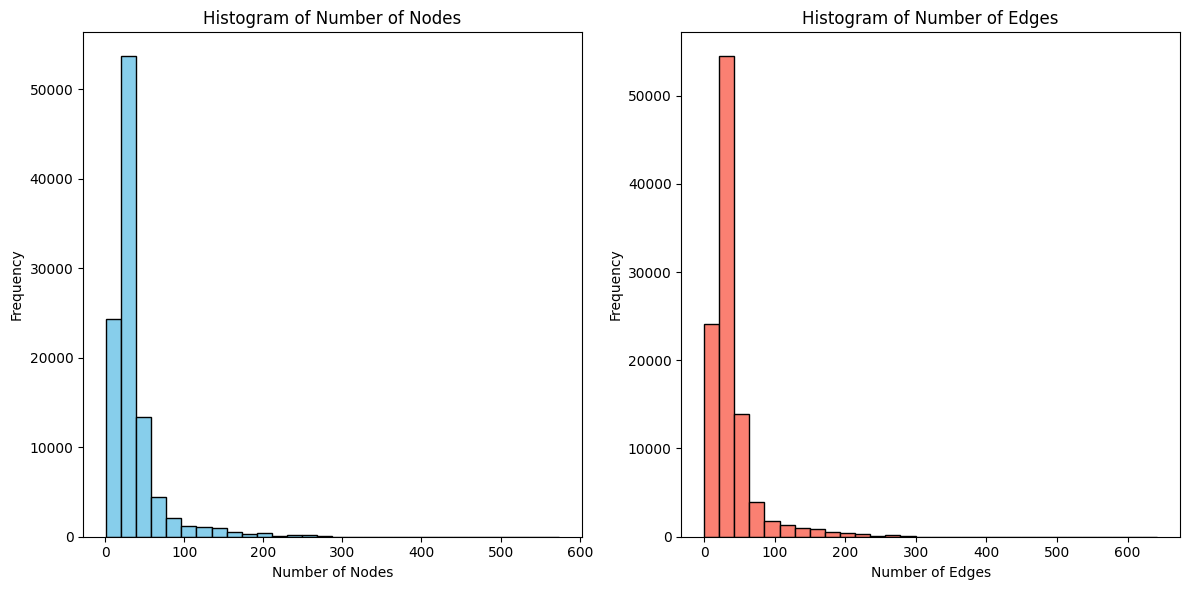

In [32]:
# Histogram plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_graph_statistics['num_nodes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_graph_statistics['num_edges'], bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Number of Edges')
plt.xlabel('Number of Edges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

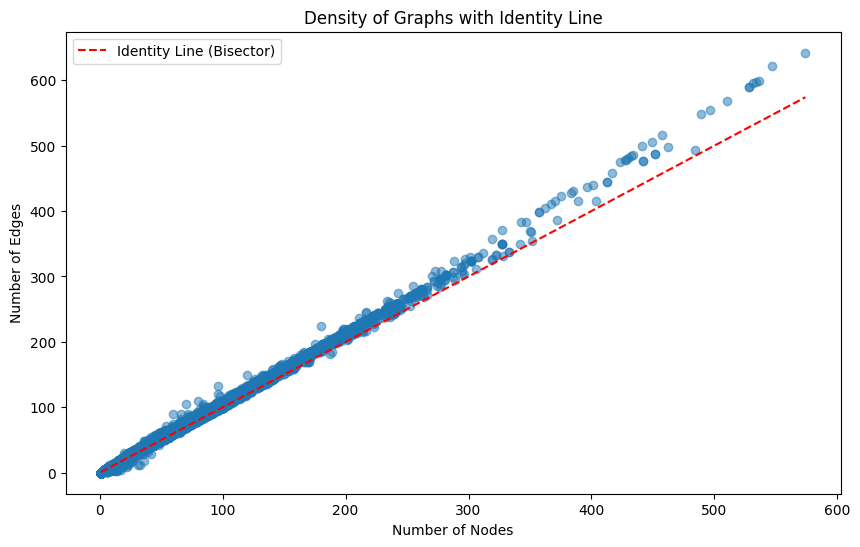

In [36]:
# Scatter plot for number of nodes vs number of edges
plt.figure(figsize=(10, 6))
plt.scatter(df_graph_statistics['num_nodes'], df_graph_statistics['num_edges'], alpha=0.5)
plt.title('Density of Graphs with Identity Line')
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Edges')

# Plot the identity line (bisector)
x = np.linspace(min(df_graph_statistics['num_nodes']), max(df_graph_statistics['num_nodes']), 100)
plt.plot(x, x, color='red', linestyle='--', label='Identity Line (Bisector)')

plt.legend()
plt.show()